<a href="https://colab.research.google.com/github/amanoese/study_keras_for_colaboratory/blob/master/dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amanoese","key":"2a7394dceb5121eaaebc13aa4e482488"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!pip install kaggle

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

Kaggle の下準備終わり

In [0]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 33.9MB/s]
 99% 269M/271M [00:01<00:00, 213MB/s]
100% 271M/271M [00:01<00:00, 224MB/s]
 97% 527M/543M [00:03<00:00, 144MB/s]
100% 543M/543M [00:03<00:00, 153MB/s]


In [0]:
!ls

kaggle.json		   sample_data		 test1.zip
kagle_original_data_small  sampleSubmission.csv  train.zip


In [29]:
!unzip -d kagle_original_data train.zip > /dev/null && echo complete:"$?"

replace kagle_original_data/train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## データの再配置

In [0]:
import os, shutil

original_dataset_dir = 'kagle_original_data/train'
base_dir = 'kagle_original_data_small'

os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')


for dir in [train_dir,test_dir,validation_dir,
            train_cats_dir,train_dogs_dir,
            validation_cats_dir,test_cats_dir,test_cats_dir,
            validation_dogs_dir,test_dogs_dir,test_dogs_dir]:
  os.makedirs(dir, exist_ok=True)

print (os.listdir())

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_cats_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src,dst)

['.config', 'sampleSubmission.csv', 'test1.zip', 'kagle_original_data', 'kagle_original_data_small', 'train.zip', 'kaggle.json', 'sample_data']


In [0]:
import os
from keras import layers 
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 13s 131ms/step - loss: 0.6892 - acc: 0.5275 - val_loss: 0.6717 - val_acc: 0.5680
Epoch 2/30
100/100 [==============================] - 8s 80ms/step - loss: 0.6456 - acc: 0.6215 - val_loss: 0.6378 - val_acc: 0.6290
Epoch 3/30
100/100 [==============================] - 8s 82ms/step - loss: 0.6019 - acc: 0.6730 - val_loss: 0.6113 - val_acc: 0.6580
Epoch 4/30
100/100 [==============================] - 8s 81ms/step - loss: 0.5633 - acc: 0.7050 - val_loss: 0.6919 - val_acc: 0.6200
Epoch 5/30
100/100 [==============================] - 8s 80ms/step - loss: 0.5331 - acc: 0.7280 - val_loss: 0.5982 - val_acc: 0.6860
Epoch 6/30
100/100 [==============================] - 8s 80ms/step - loss: 0.5084 - acc: 0.7420 - val_loss: 0.6653 - val_acc: 0.6220
Epoch 7/30
100/100 [==============================] - 8s 81ms/step -

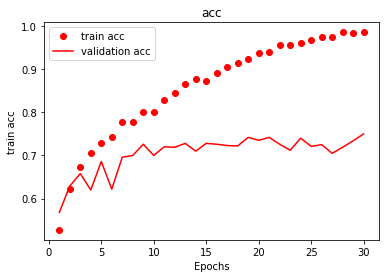

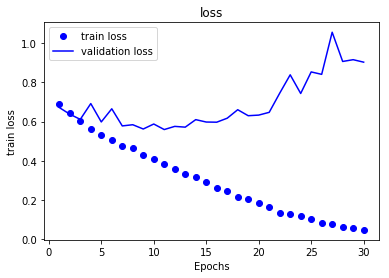

In [13]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

base_dir = 'kagle_original_data_small'

train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size= 20,
    class_mode='binary')

epoch_num = 30

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=epoch_num,
    validation_data=test_generator,
    validation_steps=50)

model.save('cats_and_dogs_small_1.h5')

### plot graph

In [0]:
epoches = range(1,int(epoch_num + 1))

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epoches,acc, 'ro',label='train acc')
plt.plot(epoches,val_acc, 'r',label='validation acc')
plt.title('acc')
plt.xlabel('Epochs')
plt.ylabel('train acc')
plt.legend()
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epoches,loss, 'bo',label='train loss')
plt.plot(epoches,val_loss, 'b',label='validation loss')

plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('train loss')
plt.legend()
plt.show()

###↑のモデルは過学習を起こす

## データを水増す


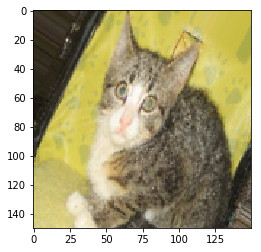

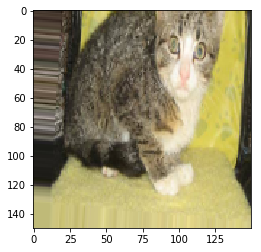

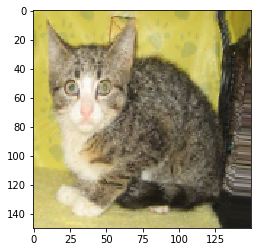

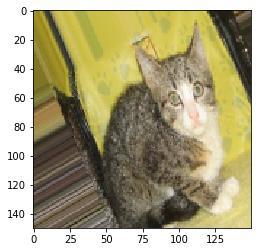

In [24]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    
    shear_range=0.2,
    zoom_range=0.2,
    
    horizontal_flip=True,
    fill_mode='nearest')


from keras.preprocessing import image


fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

## select target image
img_path = fnames[4]

## read and resize
img = image.load_img(img_path, target_size=(150, 150))

## convert array of numpu by (150,150,3)
x = image.img_to_array(img)

## reshape to (1, 150, 150, 3) 
x = x.reshape((1,) + x.shape)

## create batch by random
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 ==0:
    break
    
plt.show()

In [26]:
import os
from keras import layers 
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [27]:
base_dir = 'kagle_original_data_small'

train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    
    shear_range=0.2,
    zoom_range=0.2,
    
    horizontal_flip=True,
    fill_mode='nearest')

##　テストは水増ししない
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='binary') ## binary_crossentropyを使用するため

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='binary')

epoch_num = 30

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=epoch_num,
    validation_data=test_generator,
    validation_steps=50)

model.save('cats_and_dogs_small_2.h5')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 27s 268ms/step - loss: 0.6938 - acc: 0.5162 - val_loss: 0.6844 - val_acc: 0.5102
Epoch 2/30
100/100 [==============================] - 24s 239ms/step - loss: 0.6762 - acc: 0.5666 - val_loss: 0.6770 - val_acc: 0.5612
Epoch 3/30
100/100 [==============================] - 24s 240ms/step - loss: 0.6638 - acc: 0.5919 - val_loss: 0.6515 - val_acc: 0.6313
Epoch 4/30
100/100 [==============================] - 24s 239ms/step - loss: 0.6486 - acc: 0.6113 - val_loss: 0.6344 - val_acc: 0.6463
Epoch 5/30
100/100 [==============================] - 24s 240ms/step - loss: 0.6258 - acc: 0.6413 - val_loss: 0.6617 - val_acc: 0.6212
Epoch 6/30
100/100 [==============================] - 24s 241ms/step - loss: 0.6209 - acc: 0.6559 - val_loss: 0.5899 - val_acc: 0.6952
Epoch 7/30
100/100 [==============================] - 24s 237ms/step - loss: 0.6051 - acc: 0.6687 - val_lo

### plot graph

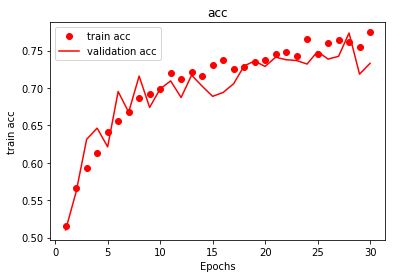

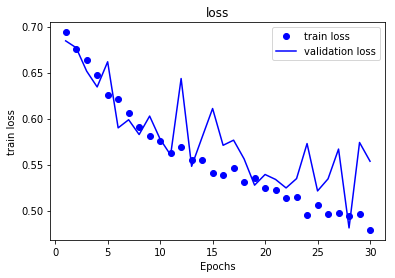

In [28]:

epoches = range(1,int(epoch_num + 1))

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epoches,acc, 'ro',label='train acc')
plt.plot(epoches,val_acc, 'r',label='validation acc')
plt.title('acc')
plt.xlabel('Epochs')
plt.ylabel('train acc')
plt.legend()
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epoches,loss, 'bo',label='train loss')
plt.plot(epoches,val_loss, 'b',label='validation loss')

plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('train loss')
plt.legend()
plt.show()